# Alpha+ Miner

## Step 1: Handling and import event data

In [1]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
log = xes_importer.apply('Road_Traffic_Fine_Management_Process.xes')

parsing log, completed traces ::   0%|          | 0/150370 [00:00<?, ?it/s]

## Step 2: Mining event log - Process Discovery

In [2]:
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha_plus(log)

## Step 3: Visualize Petri of Mined Process from log

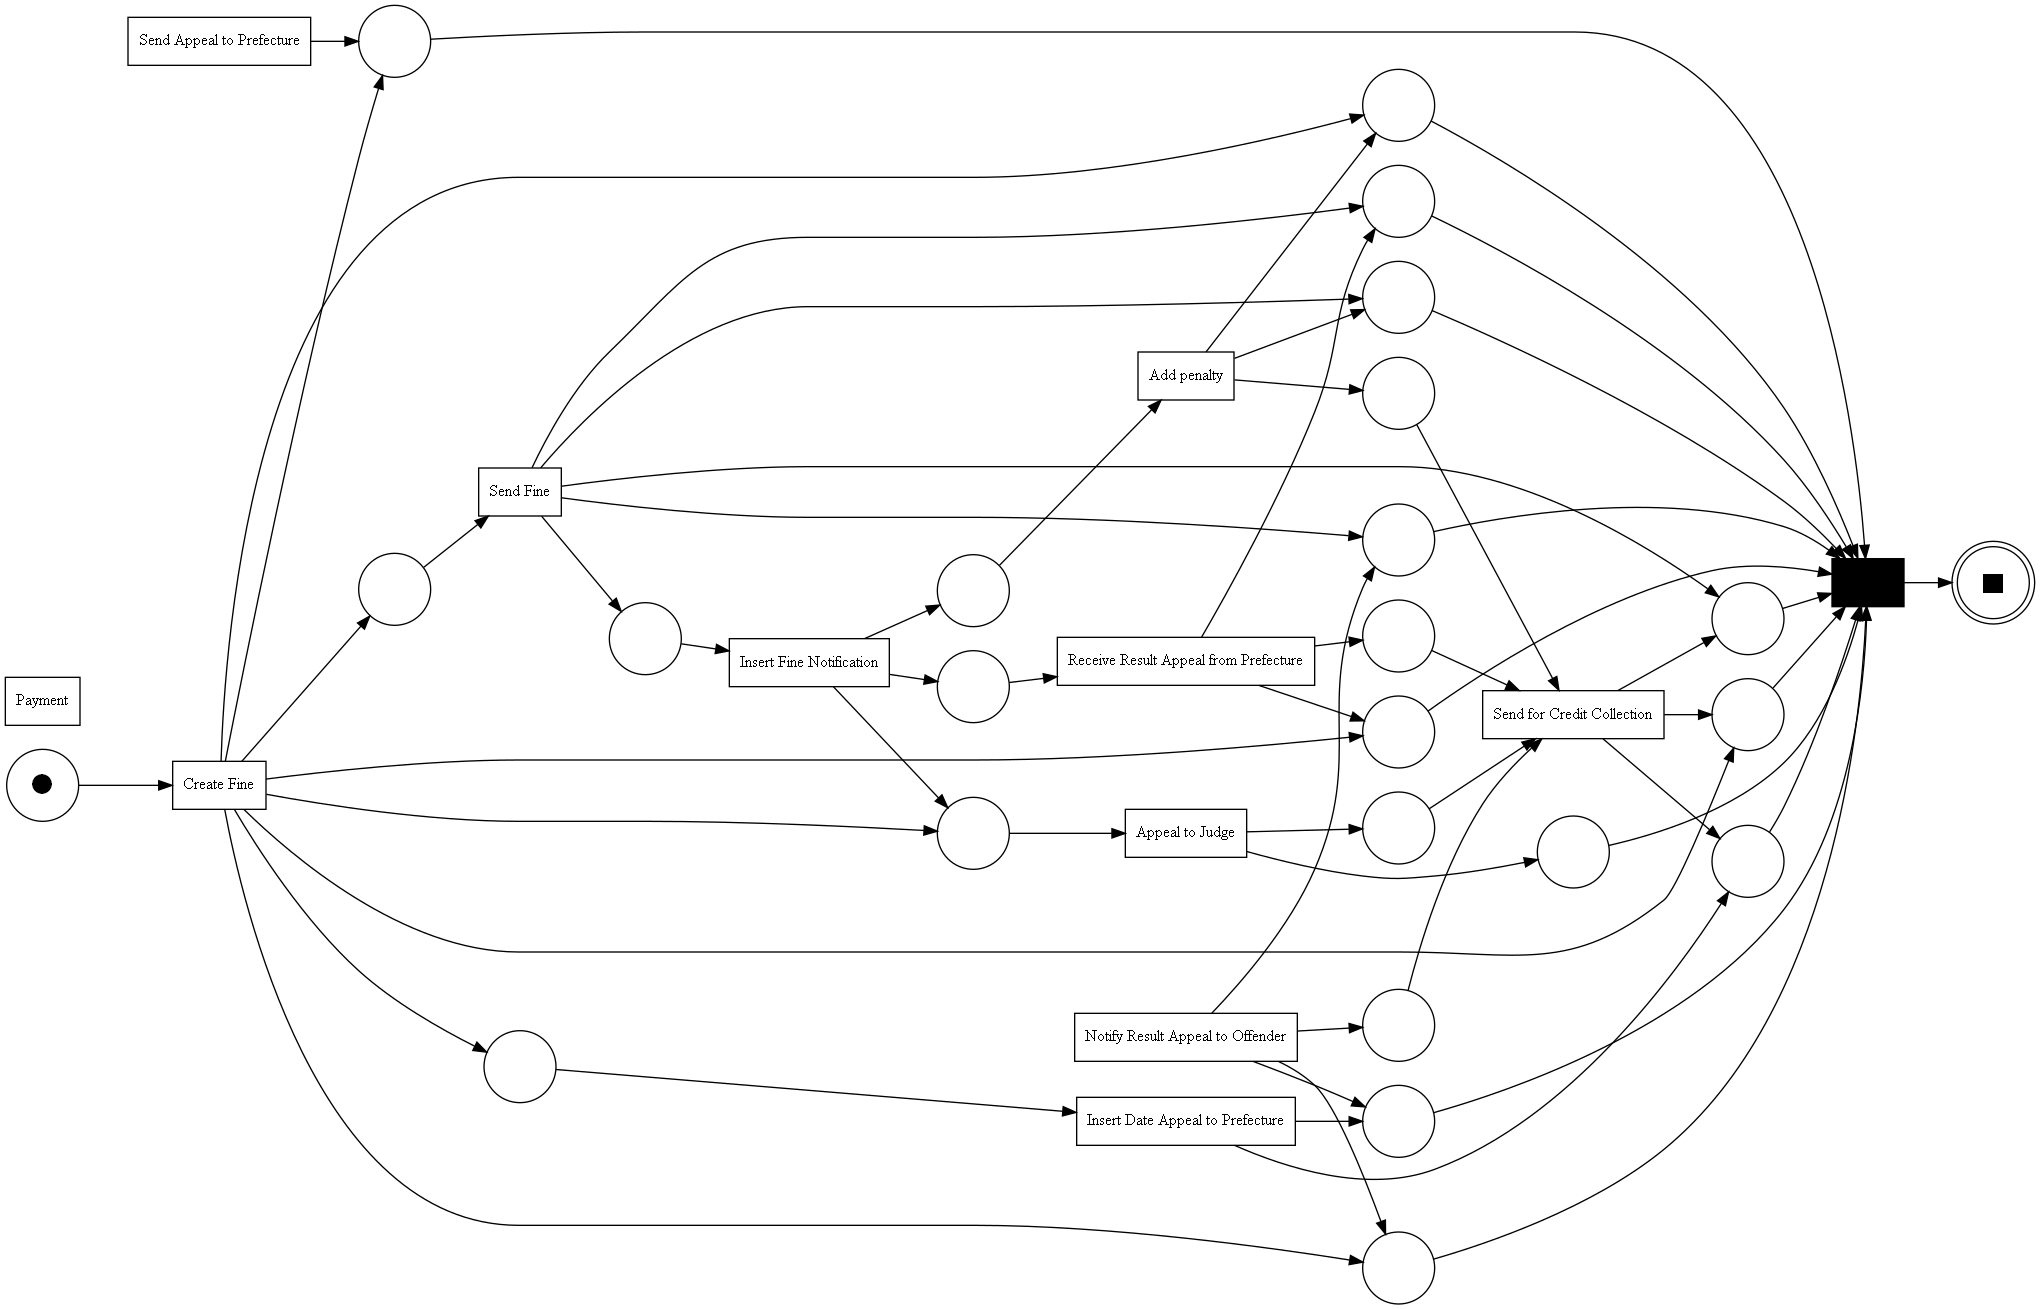

In [3]:
pm4py.view_petri_net(net, initial_marking, final_marking)

## Step 4: Convert Petri Net to BPMN

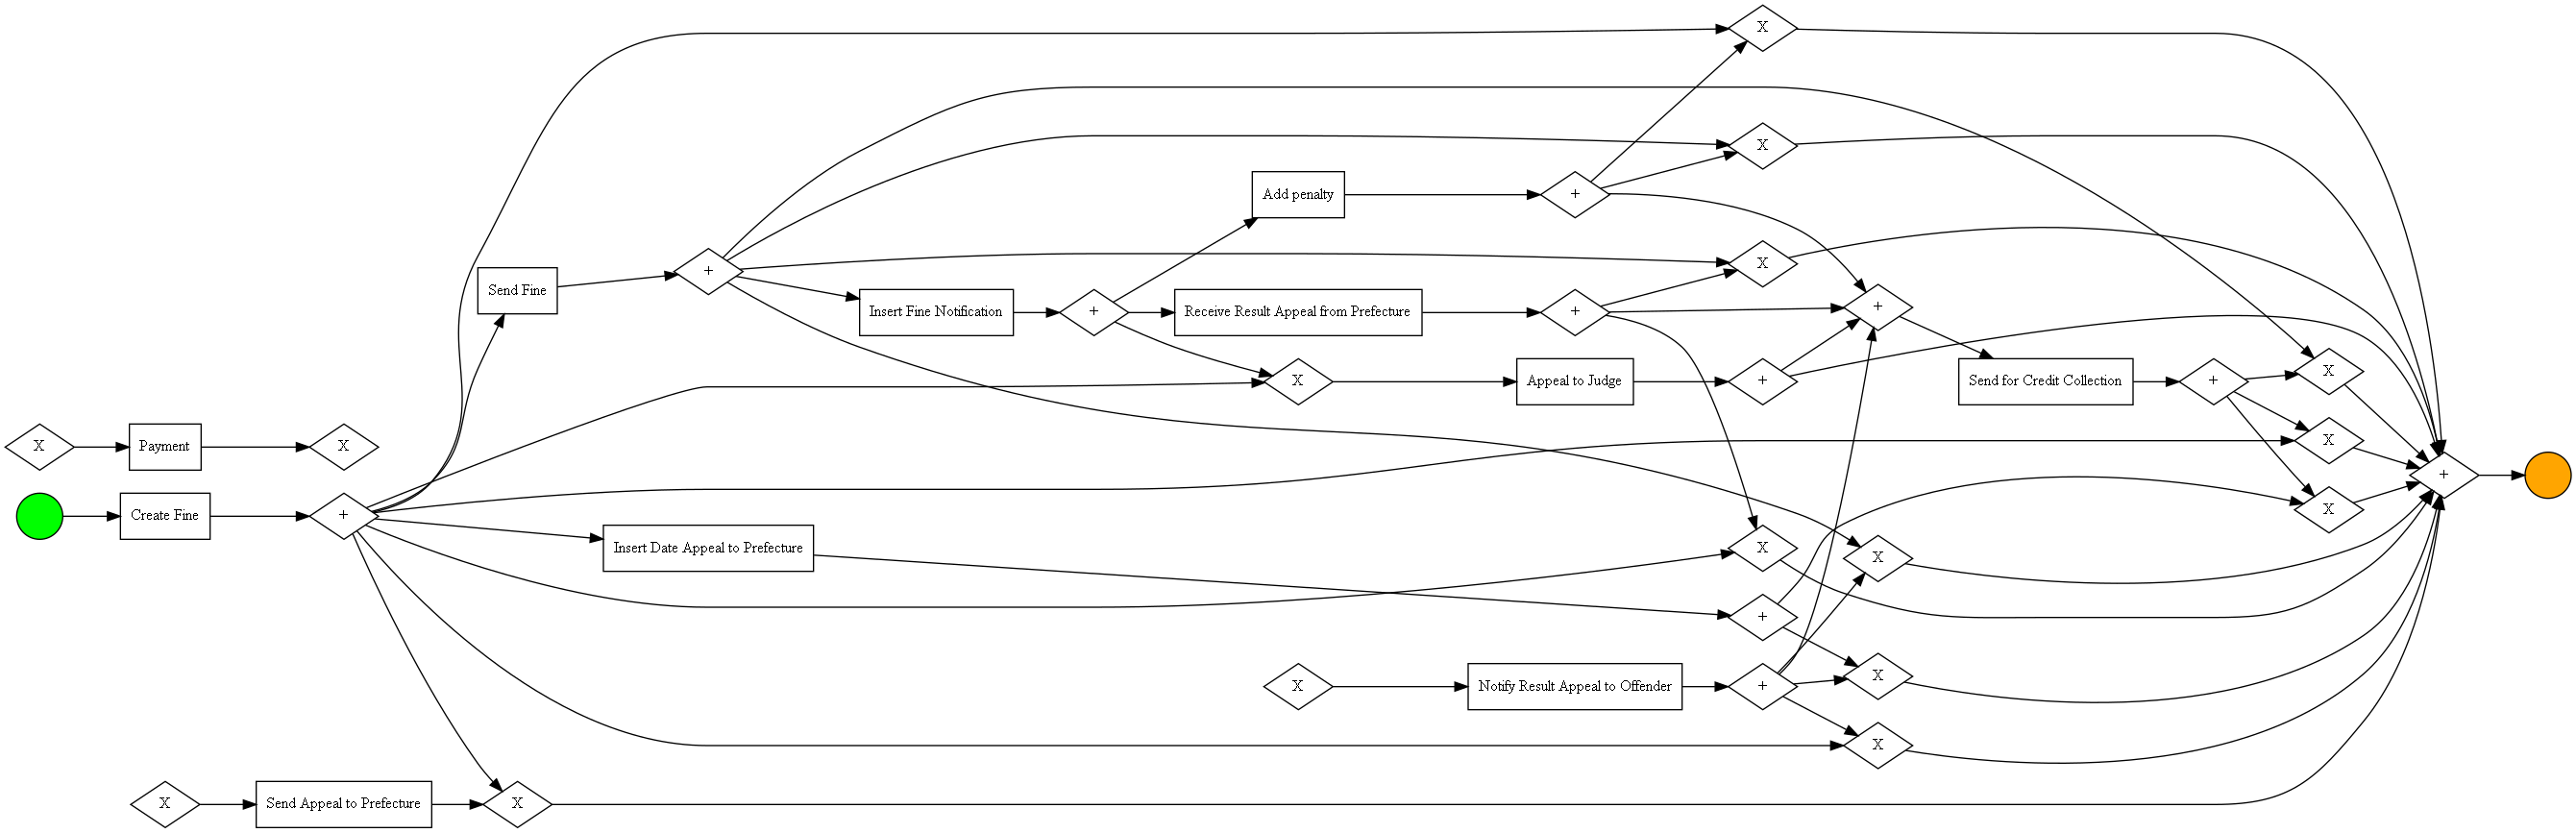

In [4]:
bpmn_graph = pm4py.convert_to_bpmn(*[net, initial_marking, final_marking])
pm4py.view_bpmn(bpmn_graph, "png")

# Step 5: Log-Model Evaluation

### Replay Fitness

In [5]:
# The calculation of the replay fitness aim to calculate how much of the behavior in the log is admitted by the process model. We propose two methods to calculate replay fitness, based on token-based replay and alignments respectively.
# The two variants of replay fitness are implemented as Variants.TOKEN_BASED and Variants.ALIGNMENT_BASED respectively.
# To calculate the replay fitness between an event log and a Petri net model, using the token-based replay method, the code on the right side can be used. The resulting value is a number between 0 and 1.

In [6]:
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
fitness = replay_fitness_evaluator.apply(log, net,  initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)

replaying log with TBR, completed variants ::   0%|          | 0/231 [00:00<?, ?it/s]

In [7]:
fitness

{'perc_fit_traces': 0.0,
 'average_trace_fitness': 0.38170560755279137,
 'log_fitness': 0.39259326690966534,
 'percentage_of_fitting_traces': 0.0}

## Precision

In [8]:
# We propose two approaches for the measurement of precision in PM4Py:
# ETConformance (using token-based replay): the reference paper is Muñoz-Gama, Jorge, and Josep Carmona. "A fresh look at precision in process conformance." International Conference on Business Process Management. Springer, Berlin, Heidelberg, 2010.
# Align-ETConformance (using alignments): the reference paper is Adriansyah, Arya, et al. "Measuring precision of modeled behavior." Information systems and e-Business Management 13.1 (2015): 37-67.

In [9]:
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec = precision_evaluator.apply(log, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)

replaying log with TBR, completed variants ::   0%|          | 0/271 [00:00<?, ?it/s]

In [10]:
prec

0.6623544318535728

## F-Measure

In [11]:
def f_measure(f, p):
    return (2*f*p)/(f+p)

In [13]:
f_measure(fitness['average_trace_fitness'], prec)

0.48431008042354323

In [14]:
%reset -f